<h1>Top Assists</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("topassist.csv")

In [3]:
df.head()


,Season,Rank,Player,Club,Age,Position,Minutes_Played,Assists_prev_season,Goals_prev_season,Assists,...,Shots_Assisted,Set_Piece_Involvement,Club_Total_Goals,Club_League_Rank,Big6_Club_Feature,Club_Attack_Share,Club_xG,Assists_per_90,xA_per_90,Key_Passes_per_90
0,2023-24,1,Ollie Watkins,Aston Villa,28,Forward,3350,15.0,14.0,13,...,55,No,76,4,No,0.42,66.9,0.35,0.17,1.48
1,2023-24,2,Cole Palmer,Chelsea,22,Midfielder,2985,3.0,3.0,11,...,46,Yes,77,6,Yes,0.43,62.2,0.33,0.19,1.38
2,2023-24,3,Anthony Gordon,Newcastle United,23,Winger,2954,2.0,11.0,10,...,48,No,85,7,No,0.25,65.3,0.30,0.18,1.46
3,2023-24,4,Kevin De Bruyne,Manchester City,32,Midfielder,1121,16.0,7.0,10,...,38,Yes,96,1,Yes,0.27,78.5,0.80,0.47,3.05
4,2023-24,5,Pascal Groß,Brighton,33,Midfielder,3241,8.0,9.0,10,...,58,Yes,55,11,No,0.35,59.3,0.28,0.20,1.61


<h3>EDA</h3>

In [4]:
print("Shape of dataset:", df.shape)
print("\nData types & null counts:")
print(df.info())
print("\nSummary statistics:")
print(df.describe().T)

Shape of dataset: (290, 24)

Data types & null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 290 non-null    object 
 1   Rank                   290 non-null    int64  
 2   Player                 290 non-null    object 
 3   Club                   290 non-null    object 
 4   Age                    290 non-null    int64  
 5   Position               290 non-null    object 
 6   Minutes_Played         290 non-null    int64  
 7   Assists_prev_season    203 non-null    float64
 8   Goals_prev_season      223 non-null    float64
 9   Assists                290 non-null    int64  
 10  Key_Passes             290 non-null    int64  
 11  Expected_Assists_(xA)  290 non-null    float64
 12  Crosses_Completed      0 non-null      float64
 13  Dribbles_Completed     290 non-null    int64  
 14  Sho

In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Season                     0
Rank                       0
Player                     0
Club                       0
Age                        0
Position                   0
Minutes_Played             0
Assists_prev_season       87
Goals_prev_season         67
Assists                    0
Key_Passes                 0
Expected_Assists_(xA)      0
Crosses_Completed        290
Dribbles_Completed         0
Shots_Assisted             0
Set_Piece_Involvement      0
Club_Total_Goals           0
Club_League_Rank           0
Big6_Club_Feature          0
Club_Attack_Share          0
Club_xG                    0
Assists_per_90             0
xA_per_90                  0
Key_Passes_per_90          0
dtype: int64


<h3>Cleaning</h3>

In [6]:
cols_to_drop = [
    "Rank", "Player", "Club",
    "Key_Passes", "Expected_Assists_(xA)",
    "Goals_prev_season", "Club_Total_Goals", "Club_xG",
    "Crosses_Completed", "Dribbles_Completed", "Set_Piece_Involvement",
    "Club_League_Rank", "Big6_Club_Feature","Key_Passes_per_90"
]

# Drop them if they exist in the DataFrame
df_cleaned = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Remaining columns after cleanup:")
print(df_cleaned.columns.tolist())

Remaining columns after cleanup:
['Season', 'Age', 'Position', 'Minutes_Played', 'Assists_prev_season', 'Assists', 'Shots_Assisted', 'Club_Attack_Share', 'Assists_per_90', 'xA_per_90']


In [28]:
desired_cols = [
    'Age', 'Position', 'Minutes_Played',
    'Assists_prev_season', 'Assists', 'Shots_Assisted',
    'Club_Attack_Share', 'Assists_per_90', 'xA_per_90'
]

# ---- 1. Load dataset ----
df = pd.read_csv("topassist.csv")
print("Original columns:", df.columns.tolist())

# ---- 2. Drop any columns not in desired list (safe) ----
cols_to_drop = [c for c in df.columns if c not in desired_cols]
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"Dropped {len(cols_to_drop)} column(s): {cols_to_drop}")
else:
    print("No extra columns to drop.")


Original columns: ['Season', 'Rank', 'Player', 'Club', 'Age', 'Position', 'Minutes_Played', 'Assists_prev_season', 'Goals_prev_season', 'Assists', 'Key_Passes', 'Expected_Assists_(xA)', 'Crosses_Completed', 'Dribbles_Completed', 'Shots_Assisted', 'Set_Piece_Involvement', 'Club_Total_Goals', 'Club_League_Rank', 'Big6_Club_Feature', 'Club_Attack_Share', 'Club_xG', 'Assists_per_90', 'xA_per_90', 'Key_Passes_per_90']
Dropped 15 column(s): ['Season', 'Rank', 'Player', 'Club', 'Goals_prev_season', 'Key_Passes', 'Expected_Assists_(xA)', 'Crosses_Completed', 'Dribbles_Completed', 'Set_Piece_Involvement', 'Club_Total_Goals', 'Club_League_Rank', 'Big6_Club_Feature', 'Club_xG', 'Key_Passes_per_90']


In [29]:
df['Assists_prev_season'] = df.groupby('Position')['Assists_prev_season'].transform(
    lambda x: x.fillna(x.median())
)

# If any NaNs still remain (e.g., missing Position values), fill with global median
if df['Assists_prev_season'].isna().any():
    global_med = df['Assists_prev_season'].median()
    df['Assists_prev_season'] = df['Assists_prev_season'].fillna(global_med)
    print(f"Some values still missing in 'Assists_prev_season' — filled with global median: {global_med}")

# ---- 5. Save cleaned CSV ----
out_fname = "cleaned_epl_assists.csv"
df.to_csv(out_fname, index=False)
print(f"Saved cleaned dataframe to '{out_fname}'")

Some values still missing in 'Assists_prev_season' — filled with global median: 9.0
Saved cleaned dataframe to 'cleaned_epl_assists.csv'


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<h3>Outlier Detection</h3>

In [30]:
df = pd.read_csv("cleaned_epl_assists.csv")

# Select numeric columns
numeric_cols = ['Age', 'Minutes_Played', 'Assists_prev_season', 
                'Assists', 'Shots_Assisted', 'Club_Attack_Share', 
                'Assists_per_90', 'xA_per_90']

# ---- IQR Method ----
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [31]:
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Outliers detected: {len(outliers)}")


Column: Age
Lower bound: 16.50, Upper bound: 36.50
Outliers detected: 1

Column: Minutes_Played
Lower bound: 2310.00, Upper bound: 3798.00
Outliers detected: 14

Column: Assists_prev_season
Lower bound: 3.50, Upper bound: 15.50
Outliers detected: 36

Column: Assists
Lower bound: 0.50, Upper bound: 20.50
Outliers detected: 0

Column: Shots_Assisted
Lower bound: -25.00, Upper bound: 95.00
Outliers detected: 12

Column: Club_Attack_Share
Lower bound: -0.01, Upper bound: 0.47
Outliers detected: 6

Column: Assists_per_90
Lower bound: 0.04, Upper bound: 0.60
Outliers detected: 3

Column: xA_per_90
Lower bound: -0.11, Upper bound: 0.34
Outliers detected: 9


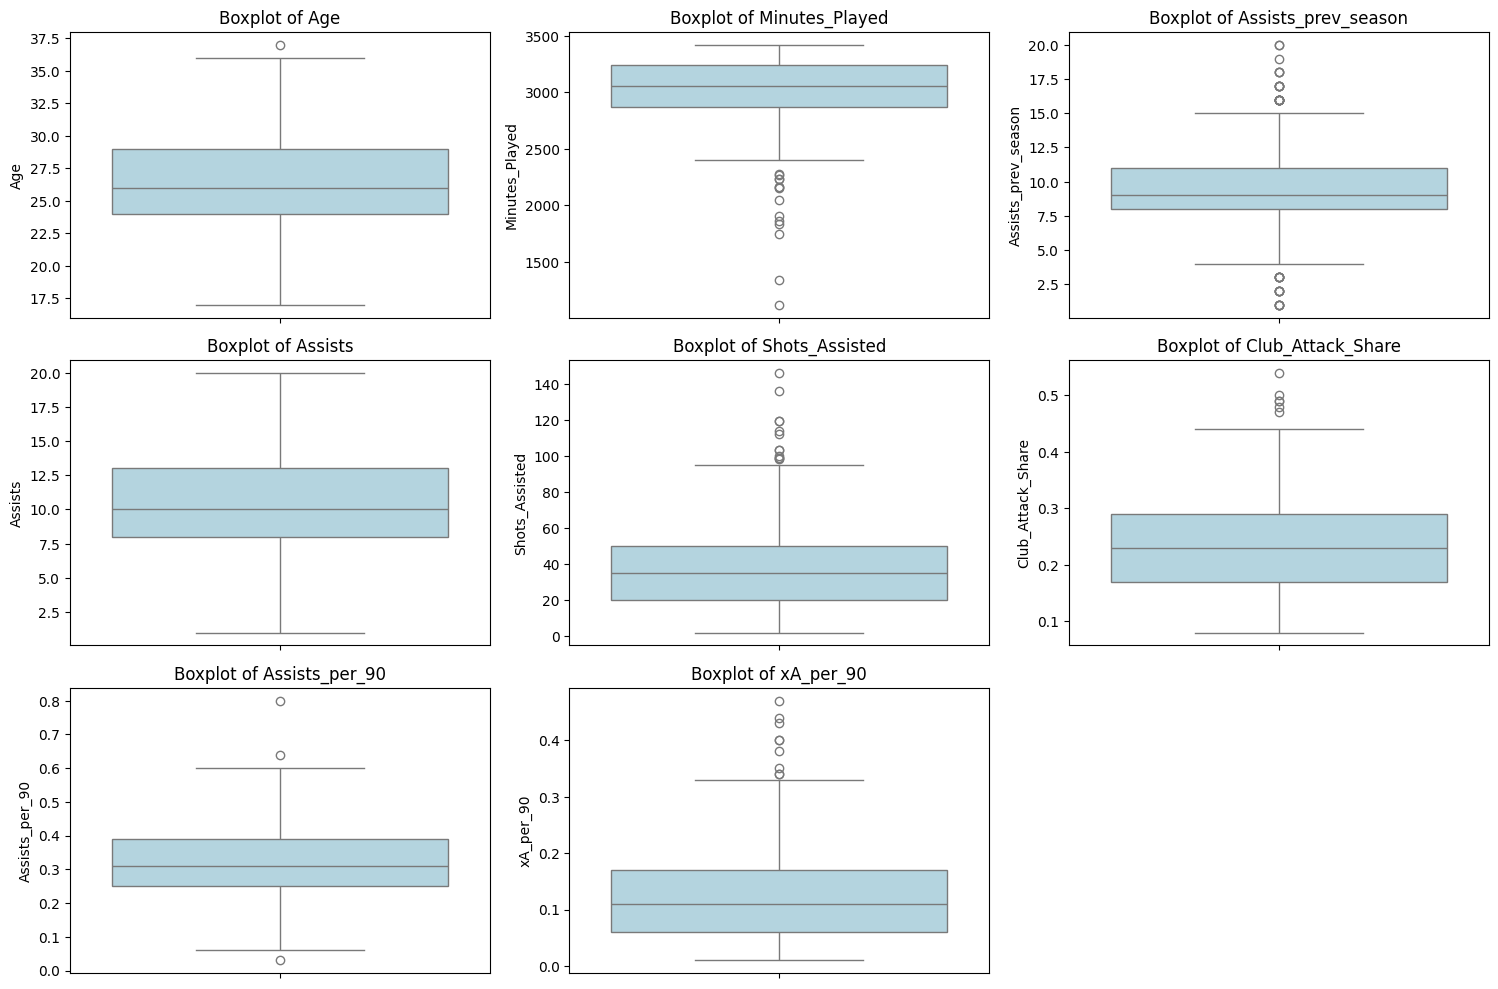

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [33]:
print("Outlier rows:")
print(outliers)

Outlier rows:
    Age    Position  Minutes_Played  Assists_prev_season  Assists  \
3    32  Midfielder            1121                 16.0       10   
10   31  Midfielder            2425                 11.0       16   
25   30  Midfielder            2484                 11.0        9   
32   29  Midfielder            2156                 20.0       11   
40   28  Midfielder            2800                 16.0       20   
50   28      Winger            2926                  4.0       15   
70   25  Midfielder            2884                  9.0       18   
80   27  Midfielder            3049                  6.0       19   
84   29      Winger            2881                  8.0       15   

    Shots_Assisted  Club_Attack_Share  Assists_per_90  xA_per_90  
3               38               0.27            0.80       0.47  
10              99               0.24            0.59       0.40  
25              77               0.27            0.33       0.34  
32              80         

I checked the outlier rows and found that none of the outliers should be removed because none of the values shown are impossible to achieve in a season.

In [34]:
print("\nFinal columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values after cleaning:\n", df.isna().sum())
print("\nPreview of cleaned dataset:\n", df.head(8))


Final columns: ['Age', 'Position', 'Minutes_Played', 'Assists_prev_season', 'Assists', 'Shots_Assisted', 'Club_Attack_Share', 'Assists_per_90', 'xA_per_90']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  290 non-null    int64  
 1   Position             290 non-null    object 
 2   Minutes_Played       290 non-null    int64  
 3   Assists_prev_season  290 non-null    float64
 4   Assists              290 non-null    int64  
 5   Shots_Assisted       290 non-null    int64  
 6   Club_Attack_Share    290 non-null    float64
 7   Assists_per_90       290 non-null    float64
 8   xA_per_90            290 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 20.5+ KB
None

Missing values after cleaning:
 Age                    0
Position               0
Minutes_Played         0
Assis

<h3>Correlation Analysis</h3>

Correlation Matrix:
                           Age  Minutes_Played  Assists_prev_season   Assists  \
Age                  1.000000       -0.031371             0.086255 -0.102699   
Minutes_Played      -0.031371        1.000000             0.210380  0.151797   
Assists_prev_season  0.086255        0.210380             1.000000  0.257880   
Assists             -0.102699        0.151797             0.257880  1.000000   
Shots_Assisted      -0.034508       -0.085870             0.056110  0.491859   
Club_Attack_Share   -0.004299        0.053968            -0.089382  0.176942   
Assists_per_90      -0.052064       -0.300935             0.169871  0.879514   
xA_per_90            0.022477       -0.352952            -0.002250  0.401388   

                     Shots_Assisted  Club_Attack_Share  Assists_per_90  \
Age                       -0.034508          -0.004299       -0.052064   
Minutes_Played            -0.085870           0.053968       -0.300935   
Assists_prev_season        0.056110 

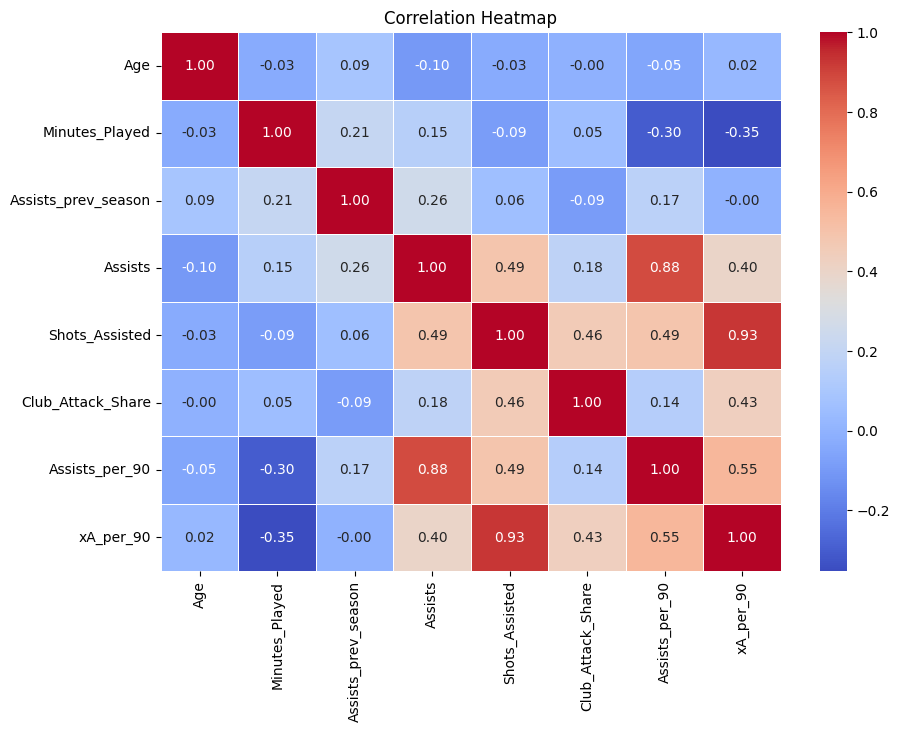


Correlation of features with 'Assists':
 Assists                1.000000
Assists_per_90         0.879514
Shots_Assisted         0.491859
xA_per_90              0.401388
Assists_prev_season    0.257880
Club_Attack_Share      0.176942
Minutes_Played         0.151797
Age                   -0.102699
Name: Assists, dtype: float64


In [35]:
df = pd.read_csv("cleaned_epl_assists.csv")

corr = df.corr(numeric_only=True)

print("Correlation Matrix:\n", corr)

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

target_corr = corr['Assists'].sort_values(ascending=False)
print("\nCorrelation of features with 'Assists':\n", target_corr)

In [37]:
# I have applied one hot encoding on "position" because it is categorical
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("cleaned_epl_assists.csv")

encoder = OneHotEncoder(drop='first', sparse_output=False)
position_encoded = encoder.fit_transform(df[['Position']])


position_cols = encoder.get_feature_names_out(['Position'])

position_df = pd.DataFrame(position_encoded, columns=position_cols, index=df.index)

df_encoded = pd.concat([df.drop(columns=['Position']), position_df], axis=1)
df_encoded.to_csv("encoded_epl_assists.csv", index=False)

print("Encoding complete. New shape:", df_encoded.shape)
print(df_encoded.head())

Encoding complete. New shape: (290, 12)
   Age  Minutes_Played  Assists_prev_season  Assists  Shots_Assisted  \
0   28            3350                 15.0       13              55   
1   22            2985                  3.0       11              46   
2   23            2954                  2.0       10              48   
3   32            1121                 16.0       10              38   
4   33            3241                  8.0       10              58   

   Club_Attack_Share  Assists_per_90  xA_per_90  Position_Forward  \
0               0.42            0.35       0.17               1.0   
1               0.43            0.33       0.19               0.0   
2               0.25            0.30       0.18               0.0   
3               0.27            0.80       0.47               0.0   
4               0.35            0.28       0.20               0.0   

   Position_Fullback  Position_Midfielder  Position_Winger  
0                0.0                  0.0          

<h3>Linear Regression</h3>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv("encoded_epl_assists.csv")

X = df.drop(columns=['Assists'])
y = df['Assists']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [40]:
print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

Model Performance:
R² Score: 0.982
MAE: 0.296
RMSE: 0.424
